In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import keras

In [28]:
## Load data and preprocessing
data = pd.read_csv('Data.csv')
scaler = StandardScaler()
data['NormalizedAmount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data = data.drop(['Amount', 'Time'], axis = 1)
y = data['Class']
x = data.drop(['Class'], axis = 1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [32]:
## DNN model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

def create_model(learn_rate=0.001, neurons=10):
# create model
  model = Sequential()
  model.add(Dense(neurons,input_dim = 29, activation = 'relu'))
  # model.add(Dense(24, activation = 'relu’))
  model.add(Dense(neurons, activation = 'relu'))
  Dropout(0.5),
  model.add(Dense(neurons, activation = 'relu'))
  model.add(Dense(1, activation = 'sigmoid'))

  opt = keras.optimizers.Adam(learning_rate=learn_rate)
  # Compile model
  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
  return model

# learn_rate = list(np.arange(0.01,0.05,0.01))
# batch_size = list(np.arange(10,50,20))

# Gridsearch params
# learn_rate = [0.0001, 0.0003, 0.0005, 0.0007, 0.001]
learn_rate = [0.0001, 0.0003 ,0.0005, 0.001]
batch_size = [10, 60]
epochs = [20, 70]
neurons = [5, 10]
param_grid = dict(batch_size=batch_size, epochs=epochs,learn_rate=learn_rate,neurons=neurons)

model = KerasClassifier(build_fn=create_model)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=None)
grid_result = grid.fit(x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Epoch 1/70
112/112 [==============================] - 0s 1ms/step - loss: 0.6278 - accuracy: 0.4205
Epoch 2/70
112/112 [==============================] - 0s 1ms/step - loss: 0.5996 - accuracy: 0.5196
Epoch 3/70
112/112 [==============================] - 0s 1ms/step - loss: 0.5748 - accuracy: 0.6054
Epoch 4/70
112/112 [==============================] - 0s 1ms/step - loss: 0.5517 - accuracy: 0.7152
Epoch 5/70
112/112 [==============================] - 0s 1ms/step - loss: 0.5295 - accuracy: 0.7973
Epoch 6/70
112/112 [==============================] - 0s 1ms/step - loss: 0.5084 - accuracy: 0.8438
Epoch 7/70
112/112 [==============================] - 0s 1ms/step - loss: 0.4882 - accuracy: 0.8732
Epoch 8/70
112/112 [==============================] - 0s 1ms/step - loss: 0.4683 - accuracy: 0.8973
Epoch 9/70
112/112 [==============================] - 0s 1ms/step - loss: 0.4483 - accuracy: 0.9161
Epoch 10/70
112/112 [==============================] - 0s 1ms/step - loss: 0.4281 - accuracy: 0.9241

In [33]:
## choose best model from gridsearch 
grid_best = grid_result.best_estimator_
history = grid_best.fit(x_train, y_train, validation_data=(x_test, y_test))

Epoch 1/70
112/112 [==============================] - 0s 3ms/step - loss: 1.1093 - accuracy: 0.6607 - val_loss: 0.9806 - val_accuracy: 0.7071
Epoch 2/70
112/112 [==============================] - 0s 1ms/step - loss: 0.9781 - accuracy: 0.6670 - val_loss: 0.8848 - val_accuracy: 0.7071
Epoch 3/70
112/112 [==============================] - 0s 1ms/step - loss: 0.8858 - accuracy: 0.6687 - val_loss: 0.8174 - val_accuracy: 0.7107
Epoch 4/70
112/112 [==============================] - 0s 1ms/step - loss: 0.8155 - accuracy: 0.6696 - val_loss: 0.7637 - val_accuracy: 0.7143
Epoch 5/70
112/112 [==============================] - 0s 1ms/step - loss: 0.7598 - accuracy: 0.6759 - val_loss: 0.7207 - val_accuracy: 0.7179
Epoch 6/70
112/112 [==============================] - 0s 1ms/step - loss: 0.7154 - accuracy: 0.6812 - val_loss: 0.6836 - val_accuracy: 0.7286
Epoch 7/70
112/112 [==============================] - 0s 1ms/step - loss: 0.6791 - accuracy: 0.6911 - val_loss: 0.6546 - val_accuracy: 0.7321
Epoch 

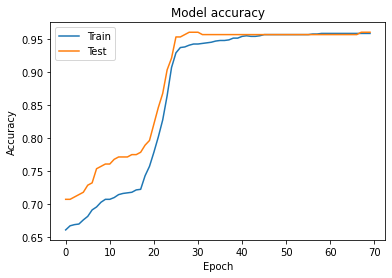

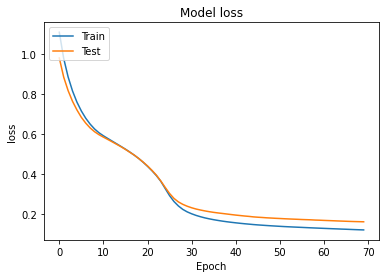

In [39]:
## DNN Draw accuracy an loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig("Model accuracy")
plt.show(block=False)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig("Model Loss")
plt.show(block=False)

In [60]:
## Draw Confusion matrix from DNN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import itertools

def confusion(model,x,y):
  y_predict = model.predict(x)
  return confusion_matrix(y,y_predict)

def plot_confusion_matrix(cm, classes,     
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    # if normalize:
    #     cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    #     print("Normalized confusion matrix")
    # else:
    #     print('Confusion matrix, without normalization')
    # print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig(title+".png")
    plt.show(block=False)


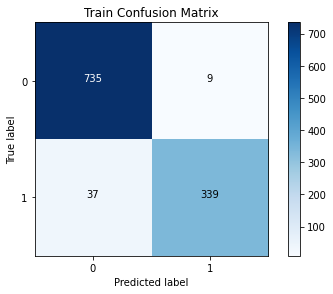

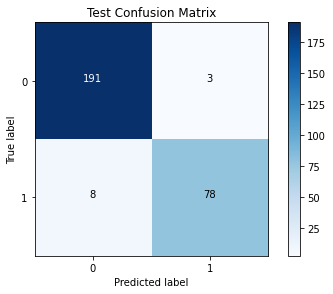

In [61]:
## Draw Confusion matrix from DNN
cm_train_DNN = confusion(grid_best,x_train, y_train)
cm_test_DNN = confusion(grid_best,x_test, y_test)

cm_plot_labels = ['0','1']

plot_confusion_matrix(cm_train_DNN, cm_plot_labels, 'Train Confusion Matrix')
plot_confusion_matrix(cm_test_DNN, cm_plot_labels, 'Test Confusion Matrix')

In [65]:
## Precision, recall, F1-score from DNN model

def calculation(cm, class_ = 1):
  TP = cm[1][1]
  FP = cm[0][1]
  FN = cm[1][0]
  TN = cm[0][0]
  if (class_ == 0):
    TP = TN
    tmp = FN
    FN = FP
    FP = tmp

  precision = TP / (TP+FP)
  recall = TP / (TP+FN)
  F1_score = 2 * (precision*recall) / (precision+recall)
  print("\nFor Class "+ str(class_))
  print("precision: ",precision)
  print("recall: ", recall)
  print("F1-score: ",F1_score) 

print("----------DNN model training-----------")
# print("acc_train=",grid_best.score(x_train,y_train))
calculation(cm_train_DNN,class_=1)
calculation(cm_train_DNN,class_=0)
print("----------testing------------------------")
# print("acc_test=",grid_best.score(x_test,y_test))
calculation(cm_test_DNN,class_=1)
calculation(cm_test_DNN,class_=0)

----------DNN model training-----------

For Class 1
precision:  0.9741379310344828
recall:  0.901595744680851
F1-score:  0.93646408839779

For Class 0
precision:  0.9520725388601037
recall:  0.9879032258064516
F1-score:  0.9696569920844327
----------testing------------------------

For Class 1
precision:  0.9629629629629629
recall:  0.9069767441860465
F1-score:  0.934131736526946

For Class 0
precision:  0.9597989949748744
recall:  0.9845360824742269
F1-score:  0.9720101781170485


In [67]:
## Decision Tree model
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3,min_samples_leaf=5,criterion='entropy')
tree.fit(x_train,y_train)

cm_train_tree = confusion(tree,x_train, y_train)
cm_test_tree = confusion(tree,x_test, y_test)

## Precision, recall, F1-score from decision tree
print("----------Decision Tree training-----------")
calculation(cm_train_tree,class_=1)
calculation(cm_train_tree,class_=0)
print("acc_train=",tree.score(x_train,y_train))

print("----------Test---------------------")
calculation(cm_test_tree, class_=1)
calculation(cm_test_tree, class_=0)
print("acc_test=",tree.score(x_test,y_test))

----------Decision Tree training-----------

For Class 1
precision:  0.9851632047477745
recall:  0.8829787234042553
F1-score:  0.9312762973352033

For Class 0
precision:  0.9438058748403576
recall:  0.9932795698924731
F1-score:  0.9679109364767517
acc_train= 0.95625
----------Test---------------------

For Class 1
precision:  0.95
recall:  0.8837209302325582
F1-score:  0.9156626506024096

For Class 0
precision:  0.95
recall:  0.979381443298969
F1-score:  0.9644670050761421
acc_test= 0.95


In [69]:
## Random Forest model
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth=4)
forest.fit(x_train, y_train)

cm_train_forest = confusion(forest, x_train, y_train)
cm_test_forest = confusion(forest, x_test, y_test)
print("----------Random Forest Training-----------")
calculation(cm_train_forest,class_=1)
calculation(cm_train_forest,class_=0)
print("acc_train=",forest.score(x_train,y_train))

print("----------Test-------------------------------")
calculation(cm_test_forest,class_=1)
calculation(cm_test_forest,class_=0)
print("acc_test=",forest.score(x_test,y_test))

----------Random Forest Training-----------

For Class 1
precision:  0.9939577039274925
recall:  0.875
F1-score:  0.9306930693069307

For Class 0
precision:  0.9404309252217997
recall:  0.9973118279569892
F1-score:  0.9680365296803654
acc_train= 0.95625
----------Test-------------------------------

For Class 1
precision:  1.0
recall:  0.8837209302325582
F1-score:  0.9382716049382717

For Class 0
precision:  0.9509803921568627
recall:  1.0
F1-score:  0.9748743718592965
acc_test= 0.9642857142857143


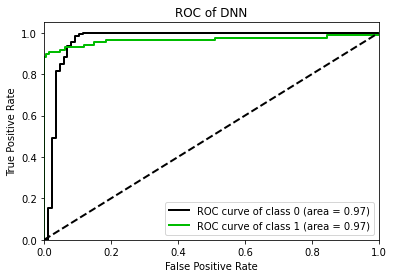

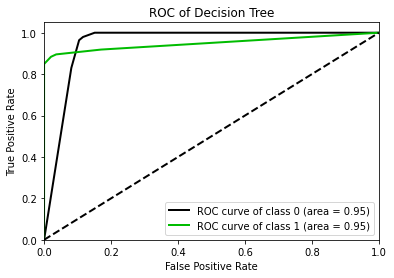

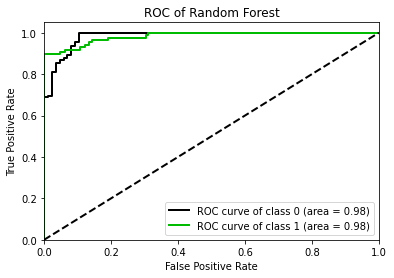

In [70]:
## ROC Curve from DNN, Decision Tree and Random Forest
!pip install scikit-plot
import scikitplot as skplt

def roc_curve(model, x_test, y_test, model_name = "model_name"):
  y_probs = model.predict_proba(x_test)
  skplt.metrics.plot_roc(y_test, y_probs, plot_micro=False, plot_macro=False)
  plt.title("ROC of "+ model_name)
  plt.savefig("ROC of "+ model_name)
  plt.show(block=False)

#Plot
roc_curve(grid_best, x_test, y_test, model_name = "DNN")
roc_curve(tree, x_test, y_test, model_name = "Decision Tree")
roc_curve(forest, x_test, y_test, model_name = "Random Forest")

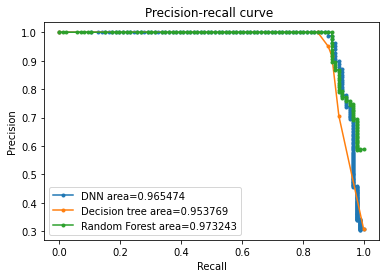

In [72]:
## Precision-Recall curve from DNN, Decision Tree and Random Forest
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

def plot_precisionrecall_curve(model,x_test,y_test, model_name="model"):
  y_probs = model.predict_proba(x_test)
  # y_probs_tree = tree.predict_proba(x_test)
  # y_probs_forest = forest.predict_proba(x_test)

  precision, recall, _ = precision_recall_curve(y_test, y_probs[:,1])
  # precision_tree, recall_tree, _ = precision_recall_curve(y_test, y_probs_tree[:,1])
  # precision_forest, recall_forest, _ = precision_recall_curve(y_test, y_probs_forest[:,1]                                                     
  plt.plot(recall, precision, marker='.', label=model_name + ' area=%f'%auc(recall, precision))

# Plot
plot_precisionrecall_curve(grid_best,x_test,y_test,model_name="DNN")
plot_precisionrecall_curve(tree,x_test,y_test,model_name="Decision tree")
plot_precisionrecall_curve(forest,x_test,y_test,model_name="Random Forest")
plt.title("Precision-recall curve ")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.savefig("Precision-recall curve")
plt.show()



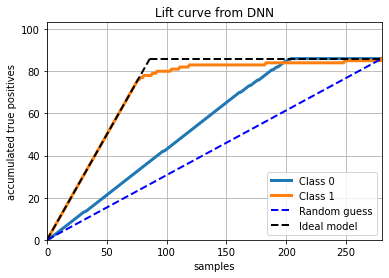

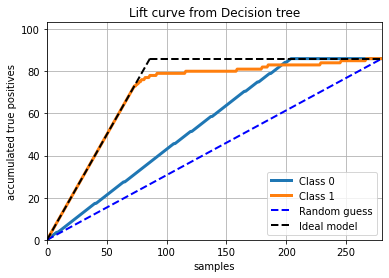

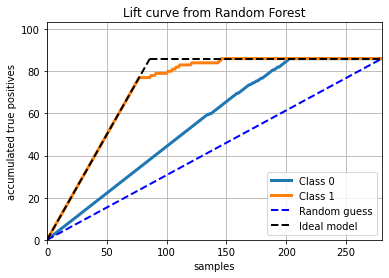

In [75]:
## Lift curve (modified by cumulative gain curve)
from scikitplot.helpers import cumulative_gain_curve
def plot_cumulative_gain(model, x_test ,y_true, model_name="model_name",
                         ax=None, figsize=None, title_fontsize="large",
                         text_fontsize="medium"):
    y_true = np.array(y_true)
    y_probas = model.predict_proba(x_test)
    y_probas = np.array(y_probas)

    classes = np.unique(y_true)
    if len(classes) != 2:
        raise ValueError('Cannot calculate Cumulative Gains for data with '
                         '{} category/ies'.format(len(classes)))

    # Compute Cumulative Gain Curves
    total = len(y_true)
    true_positive = y_true.sum()

    percentages1, gains1 = cumulative_gain_curve(y_true, y_probas[:, 0],
                                               classes[0])
    percentages2, gains2 = cumulative_gain_curve(y_true, y_probas[:, 1],
                                                classes[1])
    # print(gains1)
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=figsize)

    ax.set_title("Lift curve from "+model_name, fontsize=title_fontsize)

    ax.plot(percentages1*total, gains1*true_positive, lw=3, label='Class {}'.format(classes[0]))
    ax.plot(percentages2*total, gains2*true_positive, lw=3, label='Class {}'.format(classes[1]))

    ax.set_xlim([0.0, total])
    ax.set_ylim([0.0, true_positive*1.2])

    ax.plot([0, total], [0, true_positive], 'b--', lw=2, label='Random guess')
    ax.plot([0, true_positive], [0, true_positive], 'k--', lw=2, label='Ideal model')
    ax.plot([true_positive, total], [true_positive, true_positive], 'k--', lw=2)
    ax.set_xlabel('samples', fontsize=text_fontsize)
    ax.set_ylabel('accumulated true positives', fontsize=text_fontsize)
    ax.tick_params(labelsize=text_fontsize)
    ax.grid('on')
    ax.legend(loc='lower right', fontsize=text_fontsize)
    plt.savefig("Lift curve from "+model_name)
    return ax

plot_cumulative_gain(grid_best,x_test,y_test, model_name='DNN')
plot_cumulative_gain(tree,x_test,y_test, model_name='Decision tree')
plot_cumulative_gain(forest,x_test,y_test, model_name='Random Forest')
